Иногда при решении задач возникает требование, чтобы вектор решения был __разреженным__ (sparse), то есть содержал лишь небольшое количество ненулевых элементов. Обычно количество ненелевых элементов $x$ обозначается как $\mathrm{card}(x)$ (мощность множества, cardinality).

Некоторые задачи оптимизации могут включать в себя ограничения на количество ненулевых элементов вектора переменных:

\begin{gather}
\underset{x}{\text{min}} & f(x) \\
\text{s.t.} & \mathrm{card}(x) \leq k 
\end{gather}

Такие задачи не сложно решить, если заранее известны какие именно элементы вектора $x$ отличны от нуля (sparsity pattern). В противном случае необходимо решить $2^k$ задач для всех возможных подмножеств ненулевых переменных.

Convex-Cardinality Problems: 

Часть I: https://web.stanford.edu/class/ee364b/lectures/l1_slides.pdf

Часть II: https://web.stanford.edu/class/ee364b/lectures/l1_ext_slides.pdf

Пример: сжатие данных

\begin{gather}
\underset{x}{\text{min}} & \|x\|_0 \\
\text{s.t.} & \|\Phi x - y\|^2 \leq \epsilon 
\end{gather}

или

\begin{gather}
\underset{x}{\text{min}} & \|\Phi x - y\|^2 \\
\text{s.t.} & \|x\|_0 \leq k 
\end{gather}

Здесь используется другое распространенное обозначение: $\|x\|_0 = \mathrm{card}(x)$ - $l_0$-"норма" (не является нормой) вектора $x$, равная количеству ненулевых элементов вектора $x$:

Первую задачу можно интерпретировать как поиск минимального количества стобцов матрицы $\Phi$, некоторая линейная комбинация которых аппроксимирет данный вектор $y$ с требуемой точностью (квадрат нормы вектора невязки не превосходит $\epsilon$).

Вторая задача интепретируется как минимизация ошибки аппроксимации при заданнной степени сжатия (количество ненулевых элементов в $x$ не превосходит $k$). 

<img src="http://4.bp.blogspot.com/-a__11mmJN00/T94GGCrw2uI/AAAAAAAAF5Q/NSOpOJivwbc/s1600/compressive_sensing_example.JPG" width=600>

Поиск решения подобных задач затруднен из-за невыпуклости функции $\|x\|_0$.

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0898122115002710-gr1d.jpg">

Поэтому функцию $\|x\|_0$ заменяют на $l_1$-норму $\|x\|_1 = \sum_i |x_i|$, которая является выпуклой функцией, а, следовательно, полученная задача оптимизации будет выпуклой. Важным свойством такой замены является то, что при выполнениее определенных условий, решения обеих задач могут совпадать.

<img src="https://imgur.com/rvtXAxC.png">

http://www.machinelearning.ru/wiki/images/0/06/SLT%2C_lecture_8.pdf

Иллюстрация того, почему использование $l_1$-нормы приводит к разреженным решениям, а для $l_2$-нормы это свойство теряется:

<img src="https://www.intechopen.com/source/html/56796/media/F5.png">

На рисунке показаны множества решений уравнения $\|x\|_p = \left(\sum_i |x_i|^p\right)^{\frac{1}{p}} = 1$ для различных $p$:

<img src="https://cdn-images-1.medium.com/max/1600/1*OLFN24vF_c3y5p3tiz4_5A.png" width=600>

Пример: минимизация ранга матрицы

Пусть дана матрица $\mathbf{R} \in \mathbb{R}^{m \times n}$, для которой известны значения лишь подмножества ее элементов
$\Omega \subset \{(i,j)|1 \leq i \leq m, 1 \leq j \leq n \}$.

Идея заключается в том, чтобы аппроксимировать $\mathbf{R}$ матрицей низкого ранга:

$$\mathbf{R} \approx \mathbf{X}$$

так что $\mathrm{rank}(\mathbf{X}) \leq k$.

Если бы были известны все элементы матрицы $\mathbf{R}$, то решение можно было бы найти, основываясь на _теореме Эккарта-Янга_: 

Пусть заданную матрицу $\mathbf{R} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$ требуется приблизить некоторой другой матрицей $\mathbf{X}$ меньшего ранга $k$. Тогда

$$\arg\min_{\mathrm{rank}(X)=k} {\lVert \mathbf{R} - \mathbf{X}  \rVert}^2_F = \mathbf{U}_k \mathbf{\Sigma}_k \mathbf{V}_k^T = \sum_{i=1}^k {\sigma_i \mathbf{u}_i \mathbf{v}_i^T}$$

где $\mathbf{\Sigma}_k$ - диагональная матрица, содержащая $k$ максимальных сингулярных чисел матрицы $\mathbf{R}$, а  $\mathbf{U}_k$ и $\mathbf{V}_k$ - матрицы, состоящие из $k$ столбцов - сингулярных векторов, отвечающих старшим сингулярным числам.


Ранг матрицы равен количеству ненулевых сингулярных чисел матрицы, поэтому условие задачи можно записать $\mathrm{rank}(\mathbf{X}) = \|\sigma\|_0 \leq k$, если $\mathbf{X} = \mathbf{U}\mathbf{\Sigma}\mathbf{V}^T$ - сингулярное разложение матрицы $\mathbf{X}$ и $\sigma = \mathrm{diag}(\mathbf{\Sigma})$.

Если заменить $l_0$-"норму" на $l_1$-норму, то условие $\|\sigma\|_0 \leq k$ заменится на $\|\sigma\|_1 = \|\mathbf{X}\|_*  \leq \gamma$ для некоторого числа $\gamma$, где $\|\mathbf{X}\|_* $ обозначает _ядерную норму_ (nuclear norm, trace norm) матрицы $\mathbf{X}$.

В свете сказанного можно заметить сходство между поиском разрженного вектора и поиском матрицы низкого ранга.

Олег Граничин. Рандомизация измерений и $l_1$ оптимизация. [ссылка](http://www.math.spbu.ru/user/gran/soi5/Granichin5.pdf)

<img src="https://images.tandf.co.uk/common/jackets/amazon/978143982/9781439828694.jpg" width=300>

A User's Guide to Compressed Sensing for Communications
Systems. 
https://search.ieice.org/bin/pdf_link.php?fname=e96-b_3_685&lang=

# Sudoku

http://people.math.yorku.ca/~chensy/sudoku.pdf

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve, inv, norm

from cvxopt import matrix, solvers

In [2]:
N = 9

I = np.eye(N)
ones = np.ones((1,N))

M_vert = np.kron(I, ones)
M_horz = np.kron(ones, I)

A_row = np.kron(M_vert, I)
A_col = np.kron(M_horz, I)


J = np.hstack((I,I,I))
I3 = np.eye(3)
J3 = np.hstack((I3,I3,I3))
A_box = np.kron(I3, np.kron(J3,J)) 

A_cell = np.kron(np.eye(N**2), ones)


In [3]:
print(A_row.shape, A_col.shape, A_box.shape, A_cell.shape)

(81, 729) (81, 729) (81, 729) (81, 729)


Исходные данные:

In [4]:
X  =  np.array([[0, 1, 0, 0, 0, 0, 3, 0, 0],
                [0, 0, 3, 0, 8, 0, 0, 4, 0],
                [7, 0, 2, 0, 0, 3, 0, 0, 1],
                [0, 3, 0, 9, 4, 0, 1, 0, 0],
                [9, 0, 0, 0, 0, 0, 0, 0, 6],
                [0, 0, 4, 0, 6, 7, 0, 9, 0],
                [1, 0, 0, 7, 0, 0, 2, 0, 4],
                [0, 9, 0, 0, 5, 0, 7, 0, 0],
                [0, 0, 7, 0, 0, 0, 0, 3, 0]])

print(X.shape)

(9, 9)


In [5]:
row_idx, col_idx = np.nonzero(X)

nnz = len(row_idx)
print(nnz)

A_clue = np.zeros((nnz, N**3))
for k in range(nnz):
    i, j = row_idx[k], col_idx[k]   
    A_clue[k, i*N**2 + j*N + X[i,j] - 1] = 1


28


In [9]:
c = np.vstack((np.ones((N**3,1)), np.zeros((N**3,1))))

A = np.block([[-np.eye(N**3), np.eye(N**3)], [np.zeros((N**3,N**3)), -np.eye(N**3)]])             
b = np.zeros((A.shape[0],1))

ineq_all = np.r_[A_row, A_col, A_box, A_cell, A_clue]
n_ineq = ineq_all.shape[0]

G = np.c_[np.zeros((n_ineq, N**3)), ineq_all]
h = np.ones((n_ineq,1))

In [10]:
print(G.shape)
print(A.shape)

(352, 1458)
(1458, 1458)


In [11]:
# objective
c = matrix(c)
# inequalities
A = matrix(A)
b = matrix(b)
# equalities
G = matrix(G)
h = matrix(h)


sol=solvers.lp(c, A, b, G, h, solver='glpk')
print(sol)
xx = np.array(sol['x'])
x = xx[N**3:]

{'status': 'optimal', 'x': <1458x1 matrix, tc='d'>, 's': <1458x1 matrix, tc='d'>, 'y': <352x1 matrix, tc='d'>, 'z': <1458x1 matrix, tc='d'>, 'primal objective': 81.0, 'dual objective': 81.0, 'gap': -2.308404165485216e-30, 'relative gap': -2.849881685784217e-32, 'primal infeasibility': 2.1337967270616272e-16, 'dual infeasibility': 8.549566731296237e-16, 'primal slack': -1.2232278682030758e-15, 'dual slack': -8.43769498715119e-15, 'residual as primal infeasibility certificate': None, 'residual as dual infeasibility certificate': None}


In [12]:
print(np.sum(x>1e-3))

81


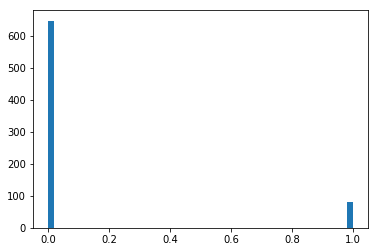

In [13]:
plt.hist(x, 50)
plt.show()

In [14]:
def decode_sudoku(x, N):
    X = np.zeros((N,N)) 
    for i in range(N):
        for j in range(N):
            idx = i*N**2 + j*N 
            r = np.argmax(x[idx:idx+N])
            X[i,j] = r+1

    return X

In [15]:
X_sol = decode_sudoku(x, N)

print(X_sol)

[[8. 1. 9. 6. 7. 4. 3. 2. 5.]
 [5. 6. 3. 2. 8. 1. 9. 4. 7.]
 [7. 4. 2. 5. 9. 3. 6. 8. 1.]
 [6. 3. 8. 9. 4. 5. 1. 7. 2.]
 [9. 7. 1. 3. 2. 8. 4. 5. 6.]
 [2. 5. 4. 1. 6. 7. 8. 9. 3.]
 [1. 8. 5. 7. 3. 9. 2. 6. 4.]
 [3. 9. 6. 4. 5. 2. 7. 1. 8.]
 [4. 2. 7. 8. 1. 6. 5. 3. 9.]]
